<a href="https://colab.research.google.com/github/Luantrannew/uni_project/blob/main/sales_export_des.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style

In [ ]:
pd.set_option('expand_frame_repr', False)
# làm cho dataframe in được nằm trên một dòng
#https://stackoverflow.com/questions/39482722/how-to-print-dataframe-on-single-line

In [ ]:
#csv này em đã public web nên không cần dẫn nguồn từ drive
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRNIo97DnNhTxqvXKhGfl_fq2Vc5ZXrHWHqojoqrOsWqAMIp-m0HadFBv3pH5qwHinh2xvucrBFj7lA/pub?gid=1342298690&single=true&output=csv')
df.head(5)

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,"17,524.02",14122.61,2/12/2020,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile,70-0511466
1,Finland,"116,563.40",92807.78,9/26/2019,Games,Hilll-Vandervort,Hube Corey,Wat Bowkley,Mobile,28-6585323
2,Portugal,"296,465.56",257480.34,7/11/2019,Clothing,Larkin-Collier,Celine Tumasian,Smitty Culverhouse,PC,58-7703341
3,Portugal,"74,532.02",59752.32,4/2/2020,Beauty,Hessel-Stiedemann,Celine Tumasian,Aurelie Wren,PC,14-6700183
4,Spain,"178,763.42",146621.76,12/22/2019,Games,Johns and Sons,Emalia Dinse,Bertha Walbrook,Tablet,15-8765160


In [ ]:
num_rows = df.shape[0]
num_columns = df.shape[1]
print(f"Bộ dữ liệu này gồm {num_rows} dòng và {num_columns} cột.")

Bộ dữ liệu này gồm 1000 dòng và 10 cột.


In [ ]:
# Kiểm tra kiểu dữ liệu của các cột
df.dtypes

country             object
order_value_EUR    float64
cost               float64
date                object
category            object
customer_name       object
sales_manager       object
sales_rep           object
device_type         object
order_id            object
dtype: object

In [ ]:
selected_columns = ['order_value_EUR', 'cost']
summary = df[selected_columns].describe()
print(summary)

       order_value_EUR           cost
count      1000.000000    1000.000000
mean     113361.738710   94369.310990
std       61775.335675   51540.020934
min       15100.570000   12113.680000
25%       65310.862500   54247.957500
50%      105419.425000   87094.760000
75%      151192.642500  125570.837500
max      383996.760000  304701.430000


In [ ]:
df[selected_columns].var()

order_value_EUR    3.816192e+09
cost               2.656374e+09
dtype: float64

In [ ]:
countries_group_values = df.groupby('country')['order_value_EUR'].mean().reset_index()

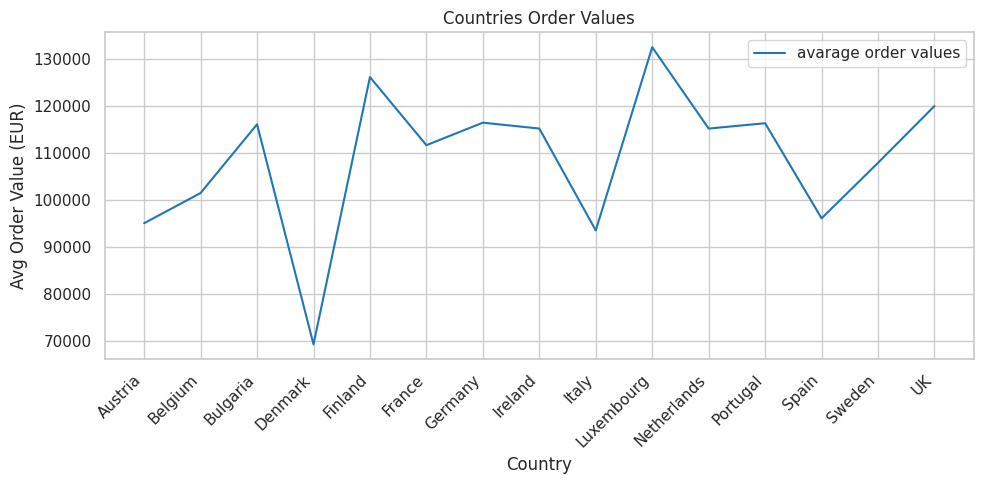

In [ ]:
import seaborn as sns
sns.set(style='whitegrid')

fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(countries_group_values['country'], countries_group_values['order_value_EUR'], color='#1f77b4', label='avarage order values')

ax1.set_xlabel('Country')
ax1.set_ylabel('Avg Order Value (EUR)')
ax1.set_title('Countries Order Values')
ax1.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # Improve spacing
plt.show()